In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

sns.set(style='whitegrid')
%matplotlib inline


In [2]:
df = pd.read_csv('preprocessed_data_extra.csv')

--- Dengeleme Öncesi Durum ---
isAttentive
1    10616
0      724
Name: count, dtype: int64




/tmp/ipykernel_43953/3794080737.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='isAttentive', data=df, palette='pastel')


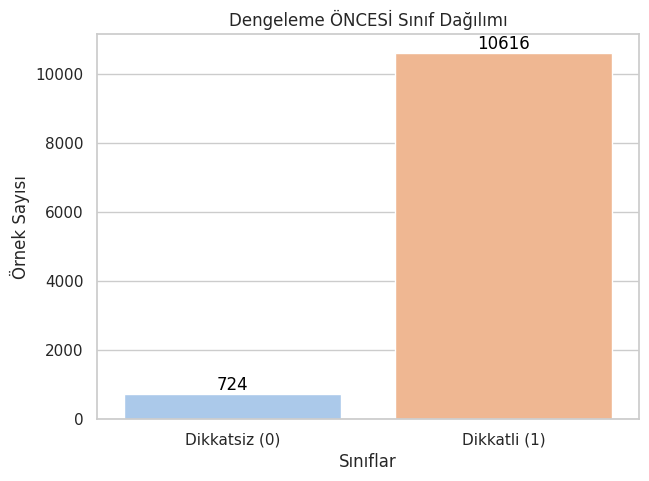

In [ ]:
print("--- Dengeleme Öncesi Durum ---")
print(df['isAttentive'].value_counts())
print("\n")

plt.figure(figsize=(7, 5))
ax1 = sns.countplot(x='isAttentive', data=df, palette='pastel')
plt.title('Dengeleme ÖNCESİ Sınıf Dağılımı')
plt.xticks([0, 1], ['Dikkatsiz (0)', 'Dikkatli (1)'])
plt.ylabel('Örnek Sayısı')
plt.xlabel('Sınıflar')

for p in ax1.patches:
    count = int(p.get_height())
    ax1.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [4]:
features = df.drop(['isAttentive', 'id', 'timestamp'], axis=1, errors='ignore')
target = df['isAttentive']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(features, target)

/home/godotgodo/Desktop/attention-analysis/.venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/home/godotgodo/Desktop/attention-analysis/.venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [5]:
print("--- Dengeleme Sonrası Durum ---")
print(pd.Series(y_resampled).value_counts())
print("\n")

--- Dengeleme Sonrası Durum ---
isAttentive
0    724
1    724
Name: count, dtype: int64




/tmp/ipykernel_43953/3684162254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='isAttentive', data=df_balanced, palette='Set2')


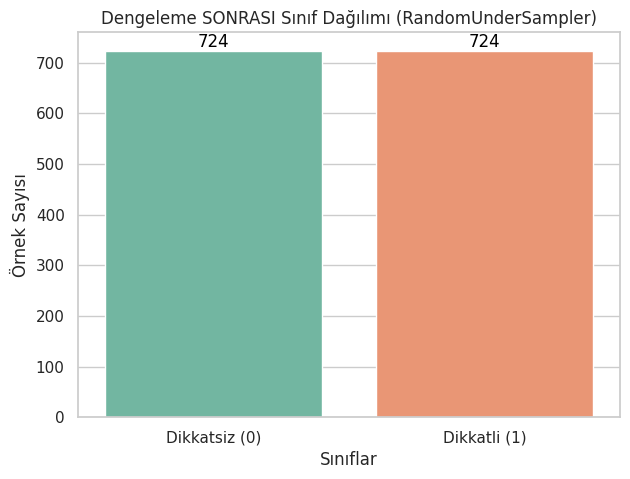

In [6]:
df_balanced = pd.DataFrame({'isAttentive': y_resampled})

plt.figure(figsize=(7, 5))
ax2 = sns.countplot(x='isAttentive', data=df_balanced, palette='Set2')
plt.title('Dengeleme SONRASI Sınıf Dağılımı (RandomUnderSampler)')
plt.xticks([0, 1], ['Dikkatsiz (0)', 'Dikkatli (1)'])
plt.ylabel('Örnek Sayısı')
plt.xlabel('Sınıflar')

for p in ax2.patches:
    count = int(p.get_height())
    ax2.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

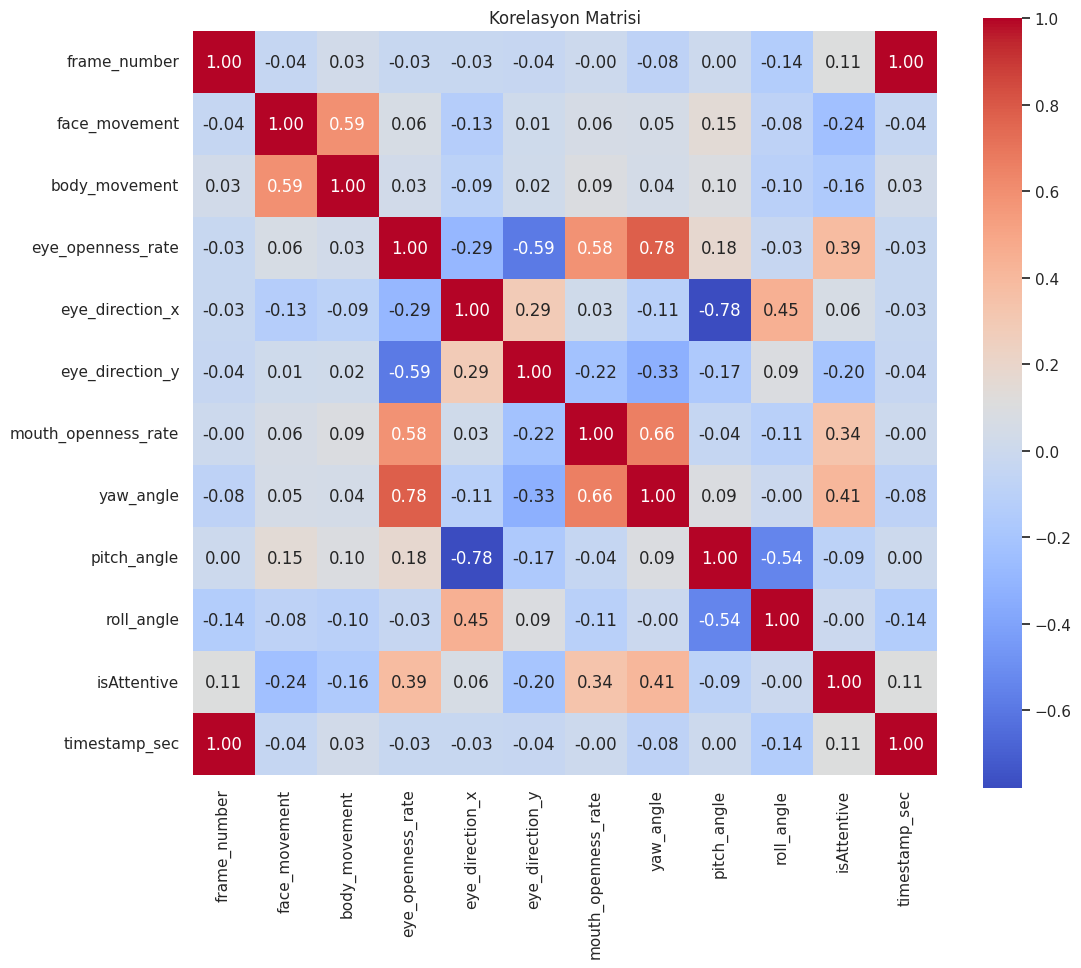

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Korelasyon Matrisi')
plt.show()